<a href="https://colab.research.google.com/github/Namanaashok/sample/blob/main/Biomedical_signal_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install neurokit2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 693.1/693.1 kB 35.3 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
685/685 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8514 - loss: 0.4965 - val_accuracy: 0.9509 - val_loss: 0.1722
Epoch 2/10
685/685 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9459 - loss: 0.1971 - val_accuracy: 0.9602 - val_loss: 0.1450
Epoch 3/10
685/685 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9527 - loss: 0.1726 - val_accuracy: 0.9617 - val_loss: 0.1367
Epoch 4/10
685/685 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9579 - loss: 0.1533 - val_accuracy: 0.9646 - val_loss: 0.1248
Epoch 5/10
685/685 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9605 - loss: 0.1471 - val_accuracy: 0.9671 - val_loss: 0.1169
Epoch 6/10
685/685 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9625 - loss: 0.1352 - val_accuracy: 0.9688 - val_loss: 0.1104
Epoch 7/10
685/685 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9640 - loss: 0.1316 - val_accuracy: 0.9717 - val_loss: 0.1044
Epoch 8/10
685/685 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9659 - loss: 0.1229 - val_accuracy: 0.

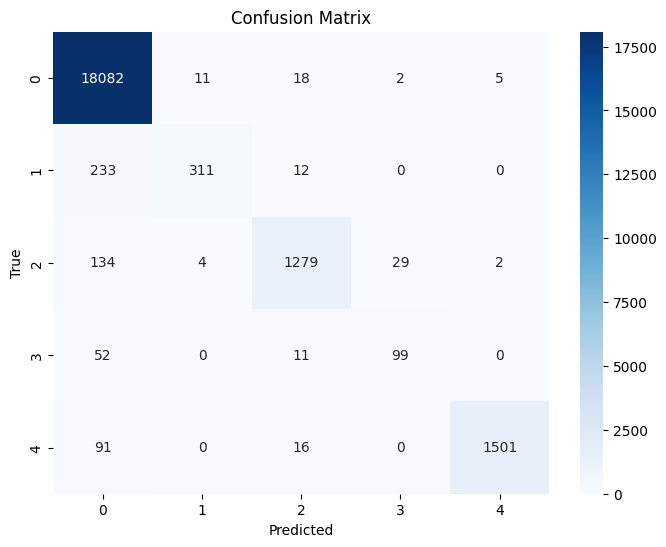

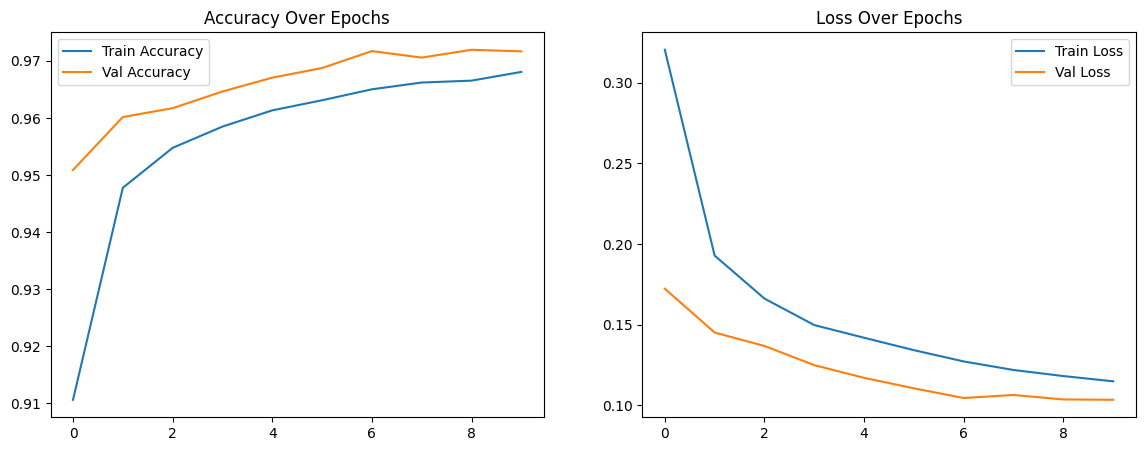

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

# 1. Load the dataset
train_df = pd.read_csv('/content/ecg_data/mitbih_train.csv', header=None)
test_df = pd.read_csv('/content/ecg_data/mitbih_test.csv', header=None)

# 2. Split features and labels
X_train = train_df.iloc[:, :-1].values
y_train = train_df.iloc[:, -1].values
X_test = test_df.iloc[:, :-1].values
y_test = test_df.iloc[:, -1].values

# 3. Preprocessing
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4. One-hot encode labels
y_train_cat = to_categorical(y_train, num_classes=5)
y_test_cat = to_categorical(y_test, num_classes=5)

# 5. Build the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(187,)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(5, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 6. Train the model
history = model.fit(X_train, y_train_cat, validation_data=(X_test, y_test_cat), epochs=10, batch_size=128)

# 7. Evaluate
loss, accuracy = model.evaluate(X_test, y_test_cat)
print(f'Test Accuracy: {accuracy:.4f}')

# 8. Classification Report
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred_classes))

# 9. Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_classes), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# 10. Training Accuracy and Loss Plot
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss Over Epochs')
plt.show()


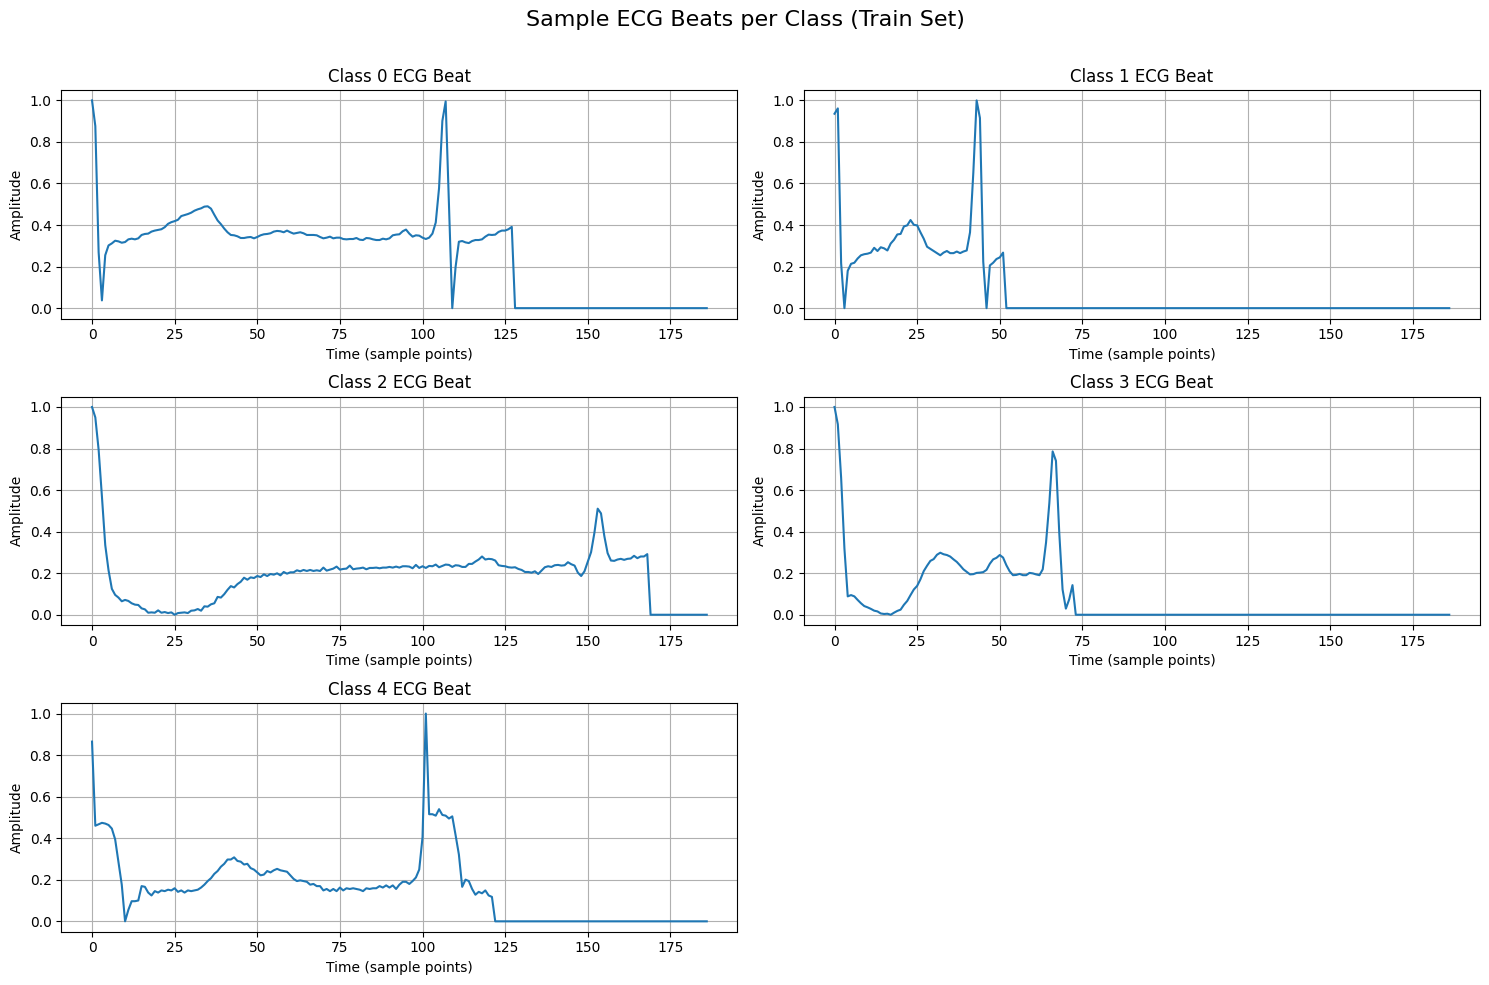

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


685/685 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8824 - loss: 0.4219 - val_accuracy: 0.9506 - val_loss: 0.1708
Epoch 2/10
685/685 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9460 - loss: 0.1974 - val_accuracy: 0.9566 - val_loss: 0.1446
Epoch 3/10
685/685 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9549 - loss: 0.1665 - val_accuracy: 0.9627 - val_loss: 0.1297
Epoch 4/10
685/685 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9590 - loss: 0.1489 - val_accuracy: 0.9668 - val_loss: 0.1185
Epoch 5/10
685/685 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9618 - loss: 0.1385 - val_accuracy: 0.9674 - val_loss: 0.1146
Epoch 6/10
685/685 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9635 - loss: 0.1326 - val_accuracy: 0.9672 - val_loss: 0.1125
Epoch 7/10
685/685 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9639 - loss: 0.1308 - val_accuracy: 0.9702 - val_loss: 0.1081
Epoch 8/10
685/685 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9657 - loss: 0.1232 - val_accuracy: 0.9701 - val_

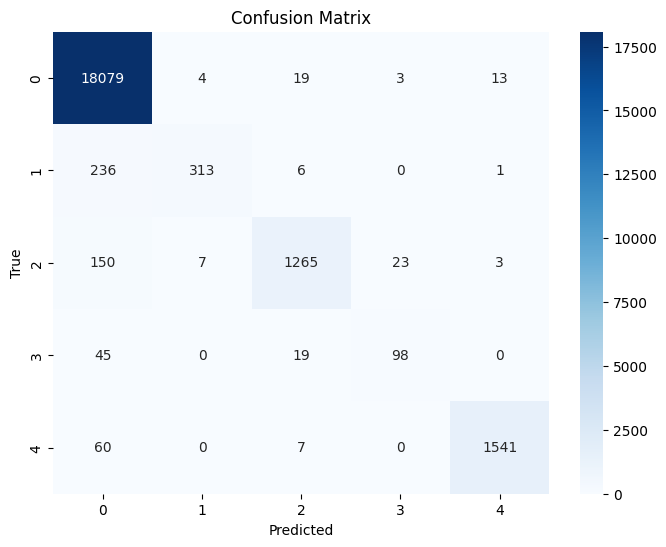

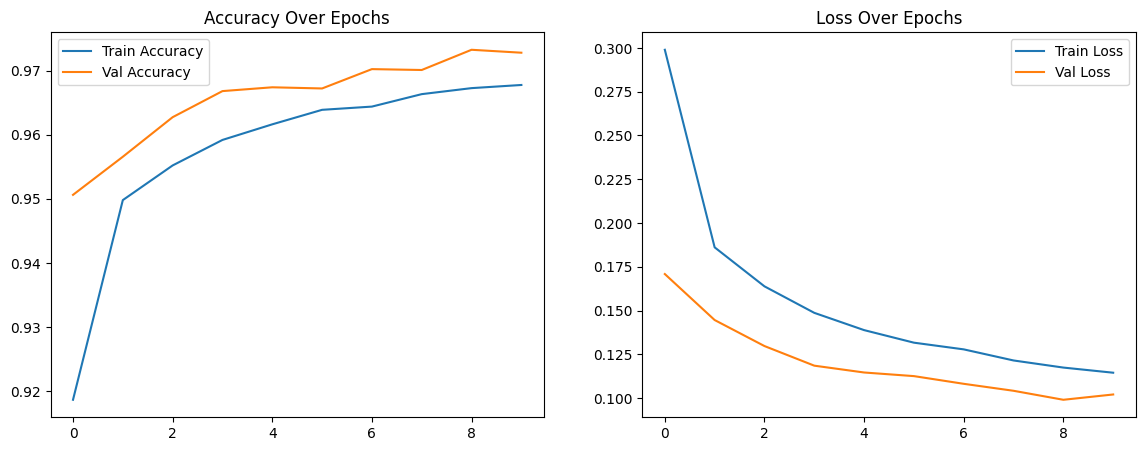

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

# 1. Load the dataset
train_df = pd.read_csv('/content/ecg_data/mitbih_train.csv', header=None)
test_df = pd.read_csv('/content/ecg_data/mitbih_test.csv', header=None)

# 2. Visualize a few ECG signals from each class
def plot_heartbeat_signals(data, title):
    plt.figure(figsize=(15, 10))
    for label in range(5):
        heartbeat = data[data[187] == label].sample(1).iloc[:, :-1].values.flatten()
        plt.subplot(3, 2, label + 1)
        plt.plot(heartbeat)
        plt.title(f'Class {label} ECG Beat')
        plt.xlabel('Time (sample points)')
        plt.ylabel('Amplitude')
        plt.grid(True)
    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()

plot_heartbeat_signals(train_df, "Sample ECG Beats per Class (Train Set)")

# 3. Split features and labels
X_train = train_df.iloc[:, :-1].values
y_train = train_df.iloc[:, -1].values
X_test = test_df.iloc[:, :-1].values
y_test = test_df.iloc[:, -1].values

# 4. Preprocessing
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 5. One-hot encode labels
y_train_cat = to_categorical(y_train, num_classes=5)
y_test_cat = to_categorical(y_test, num_classes=5)

# 6. Build the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(187,)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(5, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 7. Train the model
history = model.fit(X_train, y_train_cat, validation_data=(X_test, y_test_cat), epochs=10, batch_size=128)

# 8. Evaluate
loss, accuracy = model.evaluate(X_test, y_test_cat)
print(f'Test Accuracy: {accuracy:.4f}')

# 9. Classification Report
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred_classes))

# 10. Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_classes), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# 11. Training Accuracy and Loss Plot
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss Over Epochs')
plt.show()
